In [1]:


#                    results found in final_results_table.png  file

import nltk
import numpy as np
import pandas as pd
import random
import re
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.book import  FreqDist
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras import layers
from keras.optimizers import SGD,Adam
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from keras.layers.core import Dropout
from nltk.lm.preprocessing import padded_everygram_pipeline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Using TensorFlow backend.


In [2]:
df = pd.read_csv('Covid_19_tweets_train.csv' , encoding='latin1')
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
30929,34728,79680,"Washington, DC",6/4/2020,My family text thread included this question t...,Neutral
20124,23923,68875,"Stanford, CA",24-03-2020,"""With Americans poised to experience their mos...",Negative
10191,13990,58942,"Kennesaw, GA",20-03-2020,Many grocery retailers including our customer ...,Negative
6591,10390,55342,Southern California,19-03-2020,"@realTuckFrumper @gamestopcorp is WRONG, it's ...",Extremely Negative
23128,26927,71879,"Stratford, Ontario",25-03-2020,@CBCKW891 @CBCLondon \r\r\n\r\r\nAn entreprene...,Extremely Positive
27274,31073,76025,"Washington, D.C.",3/4/2020,Most people should see a tremendous drop in wi...,Extremely Negative
12693,16492,61444,South-West London,21-03-2020,Thinking of going to the supermarket as someon...,Negative
32574,36373,81325,upstate New York,7/4/2020,Be on the look out for COVID 19 scams,Negative
34043,37842,82794,tarn,8/4/2020,My online supermarket shopping has just arrive...,Neutral
32568,36367,81319,"Los Altos Hills, CA",7/4/2020,Hope after the Pandemic Are These 10 New Consu...,Positive


In [3]:
Datasets = [(ID,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment) for ID,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment in df.itertuples()]

In [65]:
DatasetsV2 = [OriginalTweet  for ID,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment in df.itertuples()]

In [4]:
#print(Datasets[16][-2])
#print('Â')
for i in range(22,30):
    print(Datasets[i][-2],Datasets[i][-1])
    print('\n')
    print('____________________________')
    print('\n')

We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???

#Trials

#Monthly

#Yearly 

And Resonable #Prices / #Subscriptions

Just DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #iptvnew #iptv2020 #Adult Extremely Positive


____________________________


We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???

#Trials

#Monthly

#Yearly 

And Resonable #Prices / #Subscriptions

Just DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #ipTv IPTVLinks #18Movies Extremely Positive


____________________________


@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer Negative


____________________________


UK #consumer poll indicates the 

In [5]:
def Preprocess_Data(Data):
    
    
    # Cleaning :
    # 1- remove links    
    # 2- remove none english letter
    # 3- remove null Data:
        # 1- replace NaN & ?? in location column to Unknown
        # 2- Delete ???... Tweets
     # 4- remove stopwords
    
    # Normalizing :
    # 1- change letters to lower case
    # 2- stem the words

    # Tokenize :
    # apply appropriate regulalr expression tokenizer
    #  normalize : covid?19|coronavirus|coronaviru|covid-19|covid 19|covid19|covid_19|covid2019|covid14|covid|covid2' TO 'covid'
    
    
    Preprocessed_Data = []
    Stop_Words = set(stopwords.words('english'))
    for Tweet in Data:
        
        sents = nltk.sent_tokenize(Tweet[-2])
        Cleaned_Sents = []
       
        for sent in sents:
            sent = sent.lower()
            sent = re.sub(r'https:\/\/t\.co\/[a-zA-Z0-9]*',' ', sent,0)
            sent = re.sub(r'@[a-zA-Z0-9_]*','', sent,0)
            sent = re.sub(r'\r|\n',' ', sent,0)

            sent = re.sub(r'covid?19|coronavirus|coronaviru|covid-19|covid 19|covid19|covid_19|covid2019|covid14|covid|covid2','covid', sent,0)
            sent = re.sub(r'#covid?19|#coronavirus|#coronaviru|#covid-19|#covid 19|#covid19|#covid_19|#covid2019|#covid14|#covid|#covid2','#covid', sent,0)
            sent = re.sub(r'\r|\n','', sent,0)
            sent = re.sub(r'[^0-9a-zA-Z #+_$]',' ', sent,0)       # example 604 norm on covid before this step
            
            tokenizer = TreebankWordTokenizer()
            sent = [nltk.PorterStemmer().stem(w) for w in tokenizer.tokenize(sent) if not w in Stop_Words and w != '#' and len(w) != 1]
            if(len(sent) == 0):
                continue
            Cleaned_Sents.append(sent)
        if(len(Cleaned_Sents) == 0):
            Preprocessed_Data.append((Tweet[0], Tweet[1],Tweet[2],'Unknown' if(Tweet[3] == 'nan') else Tweet[3],Tweet[4],[['No Value ..']],Tweet[6]))
            continue  
        Tweet = (Tweet[0], Tweet[1],Tweet[2],'Unknown' if(Tweet[3] == 'nan') else Tweet[3],Tweet[4],Cleaned_Sents,Tweet[6])
        Preprocessed_Data.append(Tweet)

    
                 
    
    return  Preprocessed_Data  

In [68]:
def cleaning_result(Data):  
    # Cleaning :
    # 1- remove links    
    # 2- remove none english letter
    # 3- remove null Data:
        # 1- replace NaN & ?? in location column to Unknown
        # 2- Delete ???... Tweets
     # 4- remove stopwords
    
    # Normalizing :
    # 1- change letters to lower case
    # 2- stem the words

    # Tokenize :
    # apply appropriate regulalr expression tokenizer
    
    
    #  normalize : covid?19|coronavirus|coronaviru|covid-19|covid 19|covid19|covid_19|covid2019|covid14|covid|covid2' TO 'covid'
    
    Preprocessed_Data = []
    Stop_Words = set(stopwords.words('english'))
    for Tweet in Data:
        sents = nltk.sent_tokenize(Tweet)
        Cleaned_Sents = []
        Gar_Tweets = []
       
        for sent in sents:
            sent = sent.lower()
            sent = re.sub(r'https:\/\/t\.co\/[a-zA-Z0-9]*',' ', sent,0)
            sent = re.sub(r'@[a-zA-Z0-9_]*','', sent,0)
            sent = re.sub(r'\r|\n',' ', sent,0)
            sent = re.sub(r'covid?19|coronavirus|coronaviru|covid-19|covid 19|covid19|covid_19|covid2019|covid14|covid|covid2','covid', sent,0)
            sent = re.sub(r'#covid?19|#coronavirus|#coronaviru|#covid-19|#covid 19|#covid19|#covid_19|#covid2019|#covid14|#covid|#covid2','#covid', sent,0)
            sent = re.sub(r'\r|\n','', sent,0)
            sent = re.sub(r'[^0-9a-zA-Z #+_$]',' ', sent,0)  
       
            tokenizer = TreebankWordTokenizer()
            sent = [nltk.PorterStemmer().stem(w) for w in tokenizer.tokenize(sent) if not w in Stop_Words and w != '#' and len(w) != 1]
            if(len(sent) == 0):
                continue
            Cleaned_Sents.append(sent)
        if(len(Cleaned_Sents) == 0):
            Preprocessed_Data.append((Tweet[0], Tweet[1],Tweet[2],'Unknown' if(Tweet[3] == 'nan') else Tweet[3],Tweet[4],[['No Value ..']],Tweet[6]))
            continue  
        Tweet = Cleaned_Sents
        Preprocessed_Data.append(Tweet)
  
    return  Preprocessed_Data  

In [70]:
Data1 = cleaning_result(DatasetsV2)
Data = Preprocess_Data(Datasets)

In [71]:
print(Data1[1000])
print(Data[1000][-2])


[['okay', 'peopl'], ['covid', 'thing', 'need', 'mention'], ['work', 'groceri', 'store', 'part', 'larg', 'nation', 'chain'], ['right', 'push', 'absolut', 'limit'], ['doubl', 'sometim', 'tripl', 'normal', 'daili', 'sale'], ['said']]
[['okay', 'peopl'], ['covid', 'thing', 'need', 'mention'], ['work', 'groceri', 'store', 'part', 'larg', 'nation', 'chain'], ['right', 'push', 'absolut', 'limit'], ['doubl', 'sometim', 'tripl', 'normal', 'daili', 'sale'], ['said']]


In [27]:
print(Data1[300])
print(Datasets[300][-2])

[['iran', 'prison', 'releas', 'view', 'covid', 'itali', 'prison', 'creat', 'nuisanc', 'amp', 'even', 'burnt', 'prison', 'cell', 'news', 'suspect', 'covid', 'prison', 'wherea', 'india', 'prison', 'make', 'face', 'mask', 'amp', 'sell', 'extrem', 'low', 'price'], ['bharat']]
In #Iran,prisoners were released in view of #coronavirus.In #Italy prisoners created a nuisance &amp; even burnt a prison cell after the news of a suspect of #COVID2019 in the prison.Whereas in #India,prisoners are making face masks &amp; selling them at extremely low prices.

#Bharat


In [72]:
print(Datasets[16][-2])
print('Â')

for i in range(0,3):
    print(i)
    print(Datasets[i][-2],Datasets[i][-1])
    print(Data[i][-2],Data[i][-1])
    print('\n')
    print('____________________________')
    print('\n')

????? ????? ????? ????? ??

?????? ????? ??????? ????????? ?

#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??

#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh
Â
0
@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8 Neutral
[['No Value ..']] Neutral


____________________________


1
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order Positive
[['advic', 'talk', 'neighbour', 'famili', 'exchang', 'phone', 'number', 'creat', 'contact', 'list', 'phone', 'number', 'neighbour', 'school', 'employ', 'chemist', 'gp', 'set', 'onlin', 'shop', 'account', 'poss', 'adequ', 'suppli', 'regular', 'med', 'order']] Positive


____________________________


2
Coronavirus Australia: Woolworths to give elderly, disabled de

['No Value ..', 'advic', 'talk', 'neighbour', 'famili', 'exchang', 'phone', 'number', 'creat', 'contact', 'list', 'phone', 'number', 'neighbour', 'school', 'employ', 'chemist', 'gp', 'set', 'onlin', 'shop', 'account', 'poss', 'adequ', 'suppli', 'regular', 'med', 'order', 'covid', 'australia', 'woolworth', 'give', 'elderli', 'disabl', 'dedic', 'shop', 'hour', 'amid', 'covid', 'outbreak', 'food', 'stock', 'one', 'empti', 'pleas', 'panic', 'enough', 'food', 'everyon', 'take', 'need', 'stay', 'calm', 'stay', 'safe', 'covidfr', 'covid', 'covid', 'covid', 'confin', 'confinementot', 'confinementgener', 'readi', 'go', 'supermarket', 'covid', 'outbreak', 'paranoid', 'food', 'stock', 'litterali', 'empti', 'covid', 'seriou', 'thing', 'pleas', 'panic', 'caus', 'shortag', 'covidfr', 'restezchezv', 'stayathom', 'confin', 'news', 'region', 'first', 'confirm', 'covid', 'case', 'came', 'sullivan', 'counti', 'last', 'week', 'peopl', 'flock', 'area', 'store', 'purchas', 'clean', 'suppli', 'hand', 'sanit'

total tweets after cleaning :  41157
total of sentences after cleaning :  288099
total of words after cleaning :  730574
total of characters after cleaning :  3913238
total of vocabularies after cleaning :  35410

character rate in word :  5 
word rate in sentence :  3 
repitition rate of words :  21
words frequesncy ( most common 30 words) :
make
one
us
demand
home
panic
stock
help
like
hand
worker
sanit
work
buy
pandem
time
onlin
need
get
go
shop
amp
consum
peopl
groceri
food
supermarket
store
price
covid
words frequesncy ( less common 30 words) :
wheth
fapri
llb
skimmer
truffl
quiroga
happyeast
reduceinternetpric
largo
smithfield
worldhealthday
protectthenh
contestalert
eastersunday
gcc
arrow
lockdownextens
roundtabl
particl
lockdown21
masks4al
coronalockdown
toiletpaperg
uv
ccp
5g
21daylockdown
cop
socialmedia
stayathomesavel


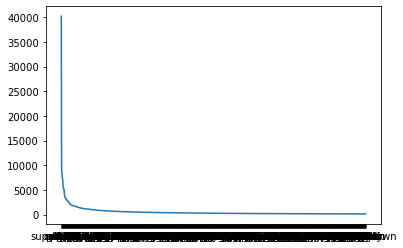

In [74]:
words = [w for sents in Data for sent in sents[-2] for w in sent]
print(words[:1000])
pargs_num = 0
sents_num = 0
words_num = 0
chars_num = 0

for w in words:
    words_num += 1
    chars_num += len(w)
for sents in Data:
    pargs_num +=1
    sents_num += len(sents)
vocs = len(set(words))
print('total tweets after cleaning : ',pargs_num)
print('total of sentences after cleaning : ',sents_num)
print('total of words after cleaning : ',words_num)
print('total of characters after cleaning : ',chars_num)
print('total of vocabularies after cleaning : ',len(set(words)))

print('\ncharacter rate in word : ',round(chars_num/words_num),
      '\nword rate in sentence : ',round(words_num/sents_num),
      '\nrepitition rate of words : ',round(words_num/len(set(words))))

fd = FreqDist(words)
print('words frequesncy ( most common 30 words) :')
FREQ_WORD_DIC = {word[1]:word[0] for i,word in enumerate(fd.most_common(43390))}
for i in sorted(FREQ_WORD_DIC)[-30:]:
    print(FREQ_WORD_DIC[i])

print('words frequesncy ( less common 30 words) :')
FREQ_WORD_DIC = {word[1]:word[0] for i,word in enumerate(fd.most_common(43390))}
for i in sorted(FREQ_WORD_DIC)[:30]:
    print(FREQ_WORD_DIC[i])
x = []
y = []
for i,word in enumerate(fd.most_common(1000)):
                        x.append(word[0])
                        y.append(word[1])

plt.plot(x,y)
plt.show()

In [75]:
print(fd.most_common(50))

[('covid', 40202), ('price', 9129), ('store', 8307), ('supermarket', 7819), ('food', 7342), ('groceri', 6786), ('peopl', 5647), ('consum', 5367), ('amp', 5197), ('shop', 5173), ('go', 4241), ('get', 3705), ('need', 3567), ('onlin', 3453), ('time', 3233), ('pandem', 3216), ('buy', 3200), ('work', 3017), ('sanit', 2937), ('worker', 2926), ('hand', 2749), ('like', 2701), ('help', 2693), ('stock', 2648), ('panic', 2610), ('home', 2486), ('demand', 2410), ('us', 2381), ('one', 2139), ('make', 2131), ('suppli', 2047), ('retail', 2018), ('day', 1935), ('take', 1879), ('mask', 1868), ('19', 1842), ('due', 1837), ('busi', 1807), ('market', 1800), ('use', 1794), ('oil', 1764), ('keep', 1753), ('stay', 1740), ('new', 1740), ('week', 1732), ('pleas', 1710), ('see', 1695), ('crisi', 1680), ('toiletpap', 1649), ('say', 1545)]


In [220]:
text = ''
for Tweet in Datasets:
    text += Tweet[-2]
HASHTAGS = re.findall('#[a-zA-Z_1-9\/]+',text)

fd = FreqDist(HASHTAGS)
print('hashtags frequesncy ( most common 20 hashtag ) :')
FREQ_HASH_DIC = {word[1]:word[0] for i,word in enumerate(fd.most_common(43390))}
for i in sorted(FREQ_WORD_DIC)[-20:]:
    print(FREQ_WORD_DIC[i])

hashtags frequesncy ( most common 20 hashtag ) :
worker
sanit
work
buy
pandem
time
onlin
need
get
go
shop
amp
consum
peopl
groceri
food
supermarket
store
price
covid


In [221]:
#for Tweet in Datasets:
#    loc = Tweet[3]
df = pd.read_csv('worldcities.csv' , encoding='latin1')
df.sample(10)  

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
23372,Barberton,Barberton,45.7136,-122.6115,United States,US,USA,Washington,NaN,6941.0,1840017397
26311,Nata,Nata,-20.2095,26.1900,Botswana,BW,BWA,Central,NaN,4794.0,1072462404
8500,SÃ£o Domingos,Sao Domingos,15.0250,-23.5625,Cabo Verde,CV,CPV,SÃ£o Domingos,admin,2818.0,1132246964
11669,Macenta,Macenta,8.5504,-9.4800,Guinea,GN,GIN,NâZÃ©rÃ©korÃ©,minor,43102.0,1324817479
10959,Guillermo E. Hudson,Guillermo E. Hudson,-34.7903,-58.1486,Argentina,AR,ARG,Buenos Aires,NaN,52697.0,1032658135
11770,Greenwood,Greenwood,34.1945,-82.1542,United States,US,USA,South Carolina,NaN,42429.0,1840013626
5892,ÅÉmkir,Samkir,40.8564,46.0172,Azerbaijan,AZ,AZE,ÅÉmkir,admin,40600.0,1031776445
23689,Crystal Lake,Crystal Lake,28.0371,-81.9063,United States,US,USA,Florida,NaN,6671.0,1840029030
15471,Rayevskiy,Rayevskiy,54.0674,54.9269,Russia,RU,RUS,Bashkortostan,NaN,20060.0,1643613500
8023,Cove,Cove,51.2965,-0.7939,United Kingdom,GB,GBR,Hampshire,NaN,6548.0,1826177889


In [222]:
countries = [(ID1,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,ID2)
             for ID1,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,ID2 in df.itertuples()]

In [223]:
for country in countries[:100]:
    
    print(country[1],country[5])


Tokyo Japan
Jakarta Indonesia
Delhi India
Mumbai India
Manila Philippines
Shanghai China
SÃ£o Paulo Brazil
Seoul Korea, South
Mexico City Mexico
Guangzhou China
Beijing China
Cairo Egypt
New York United States
KolkÄta India
Moscow Russia
Bangkok Thailand
Buenos Aires Argentina
Shenzhen China
Dhaka Bangladesh
Lagos Nigeria
Istanbul Turkey
Åsaka Japan
Karachi Pakistan
Bangalore India
Tehran Iran
Kinshasa Congo (Kinshasa)
Ho Chi Minh City Vietnam
Los Angeles United States
Rio de Janeiro Brazil
Nanyang China
Chennai India
Chengdu China
Lahore Pakistan
Paris France
London United Kingdom
Linyi China
Tianjin China
Shijiazhuang China
Baoding China
Zhoukou China
Lima Peru
HyderÄbÄd India
BogotÃ¡ Colombia
Weifang China
Nagoya Japan
Wuhan China
Heze China
Ganzhou China
Tongshan China
Chicago United States
Handan China
Luanda Angola
Fuyang China
Kuala Lumpur Malaysia
Jining China
Dongguan China
Hanoi Vietnam
Pune India
Chongqing China
Changchun China
Zhumadian China
Ningbo China
Onitsha Nigeri

In [76]:

for Tweet in Data[:10]:
    
    print(Tweet[3])    
    print('\n')
    print('__________________________')

London


__________________________
UK


__________________________
Vagabonds


__________________________
nan


__________________________
nan


__________________________
ÃT: 36.319708,-82.363649


__________________________
35.926541,-78.753267


__________________________
Austria


__________________________
Atlanta, GA USA


__________________________
BHAVNAGAR,GUJRAT


__________________________


In [ ]:
#cleaning location column in data
C_locs = [Tweet[3] for Tweet in Data if(str(Tweet[3]) != 'nan' and len(re.findall(r'[1-9\?]',str(Tweet[3]))) == 0)]
#normalizing location column in data
locs = [country[1] for Tweet in Data for country in countries if (len(re.findall(country[1].lower(),str(Tweet[3]).lower()))!=0)]
fd = FreqDist(words)
x = []
y = []
for i,word in enumerate(fd.most_common(1000)):
                        x.append(word[0])
                        y.append(word[1])

plt.plot(x,y)
plt.show()
print(locs)  

In [6]:
# tools

def get_Most_Commmon(vector_size,words):
    fd = FreqDist(words)
    MCW = {word[0]:i for i,word in enumerate(fd.most_common(vector_size))}
    return MCW
    
def AOW_AOS(data):
    out = []
    s = ''
    for ind in data:
        sample = ind[-2]
        for sentence in sample:
            for word in sentence:
                s += word + ' '
        out.append(s)
        s = ''
    return out
            
# vectorizers
def Bag_Of_Word_Vectorizer(data, vector_size , words):
    
    dictionary = get_Most_Commmon(vector_size,words)
    out = []
    
    for sample in data:
        BOW = np.zeros(len(dictionary))
        
        sentence_ = nltk.tokenize.WhitespaceTokenizer().tokenize(sample)

        for w in sentence_:
            
            if w in dictionary:
                BOW[dictionary[w]] += 1
        out.append(BOW)
    return dictionary,out


def Tf_idf_Vectorizer(tr_sentences,max_document_frequency,min_document_frequency,ngrams):
    
    tfidf_vectorizer = TfidfVectorizer(min_df=min_document_frequency, max_df=max_document_frequency, ngram_range=(1, ngrams))
    features = tfidf_vectorizer.fit_transform(tr_sentences)
  
    return tr_sentences,tfidf_vectorizer, tfidf_vectorizer.vocabulary_,features


def Prepare_For_Embedding(tr_sentences,ts_sentences,words_numbers,padding_size):
    tokenizer = Tokenizer(num_words=words_numbers)
    tokenizer.fit_on_texts(tr_sentences)

    X_train = tokenizer.texts_to_sequences(tr_sentences)
    X_test = tokenizer.texts_to_sequences(ts_sentences)
    
    vocab_size = len(tokenizer.word_index) + 1
    
    X_train = pad_sequences(X_train, padding='post', maxlen=padding_size)
    X_test = pad_sequences(X_test, padding='post', maxlen=padding_size)
    
    return vocab_size,X_train,X_test

In [79]:
out1 = AOW_AOS(Data)

# bag of words test
dictionary,out2 = Bag_Of_Word_Vectorizer(out1, 10000, words)
print(out1[500],out2[500][5])
print('Dic :' ,dictionary['sure'])
counter = 0
for i in range(0,10000):
    if(out2[500][i] >= 1):
        print('index : ',i)
        print('repitition : ',out2[500][i])
        counter += 1

still part commun even stay home stay posit alonetogeth  0.0
Dic : 218
index :  25
repitition :  1.0
index :  42
repitition :  2.0
index :  63
repitition :  1.0
index :  80
repitition :  1.0
index :  154
repitition :  1.0
index :  272
repitition :  1.0
index :  275
repitition :  1.0
index :  3618
repitition :  1.0


In [33]:

# tf idf test
tr_sentences,tfidf_vectorizer, tfidf_vectorizer.vocabulary_,features = Tf_idf_Vectorizer(out1,1000,20,1)
print(len(tfidf_vectorizer.vocabulary_))

pd.DataFrame(
    features.todense(),
    columns=tfidf_vectorizer.get_feature_names()
)

3220


,00,000,03,10,100,1000,11,12,13,14,...,york,young,youth,youtub,yr,zealand,zero,zombi,zone,zoom
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41153,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41154,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41155,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:

# test preparation
vocab_size,X_train,X_test = Prepare_For_Embedding(out1,out1,10000,30)
print(X_train[40000])

[1861  849   41   43  848 6093 6093  448    1   71  103  128  389 1722
 3103    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [36]:
# classifiers


# internal training

def Logistic_Regression(X_train, y_train,X_test, y_test):
    
    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    
    y_test_predicted = classifier.predict(X_test)
    y_test_scores = classifier.decision_function(X_test)
 
    return classifier

def One_Vs_Rest_Classifier(X_train, y_train,X_test, y_test):
    
    classifier = OneVsRestClassifier()
    classifier.fit(X_train, y_train)
    
    y_test_predicted = classifier.predict(X_test)
    y_test_scores = classifier.decision_function(X_test)
 
    return classifier

def Ridge_Classifier(X_train, y_train,X_test, y_test):
    
    classifier = RidgeClassifier()
    classifier.fit(X_train, y_train)
    
    y_test_predicted = classifier.predict(X_test)
    y_test_scores = classifier.decision_function(X_test)
 
    return classifier


def Support_Vector_Machine_Classifier(X_train,y_train,degree,coefficient):
    
    classifier = svm.SVC(kernel='ploy')
    classifier.fit(X_train,y_train)
    
    return classifier
    
    
# external training

def Embedding_Classifier(vocab_size,embedding_dim,maxlen):
    
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

def Embedding_Classifier_With_Pooling_Layer(vocab_size,embedding_dim,maxlen):
    
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
    model.add(layers.GlobalMaxPool1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

    
def Embedding_Classifier_With_Convolution_Layer(vocab_size,embedding_dim,maxlen): 
    
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model


In [37]:
# training

def Train_Model(model,X_train, y_train,X_test, y_test, epochs, batch_size,):
    history = model.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=batch_size)
    tr_loss, tr_accuracy = model.evaluate(X_train, y_train, verbose=False)   
    ts_loss, ts_accuracy = model.evaluate(X_test, y_test, verbose=False)

    return tr_loss, tr_accuracy,ts_loss, ts_accuracy,history

In [40]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 3, 2]

In [ ]:
classifier.predict([[2]])

In [41]:
print(len(out1),len(Datasets),len(Data))


41157 41157 41157


In [42]:
print(set([sents[-1] for sents in Datasets]))

{'Positive', 'Neutral', 'Negative', 'Extremely Negative', 'Extremely Positive'}


In [80]:
distionary_binary = {'Positive' : 1, 'Negative' : 0, 'Extremely Negative' : 0, 'Extremely Positive' : 1, 'Neutral' : 2}
distionary_btest = {'Positive' : 1, 'Negative' : 0, 'Extremely Negative' : 0, 'Extremely Positive' : 1}
distionary_multi = {'Positive' : 0, 'Negative' : 1, 'Extremely Negative' : 2, 'Extremely Positive' : 3, 'Neutral' : 4}
y = np.zeros(len(out1))
counter = 0
for i in range(0,len(Datasets)):
    if(Datasets[i][-1] in distionary_binary):
        y[i] = distionary_binary[Datasets[i][-1]]
        counter+=1

x = []
temp = []
indices = []
for i in range(0,len(Datasets)):
    if(Datasets[i][-1] == 'Neutral'):
        continue
    x.append(out1[i])
    temp.append(Datasets[i])
    indices.append(i)
BOW_Data = x.copy()
print(len(x))
print(len(indices))
y = np.zeros(len(x))
y_multi = np.zeros((len(x),5))

counter = 0
for i in indices:
    y[counter] = distionary_btest[Datasets[i][-1]]
    y_multi[counter][distionary_multi[Datasets[i][-1]]] = 1              
    counter+=1



training_set_size = int(len(x)*0.75)


X_train = x[:training_set_size]
y_train = y[:training_set_size]
y_train_multi = y_multi[:training_set_size]

X_test = x[training_set_size:]
y_test = y[training_set_size:]
y_test_multi = y_multi[training_set_size:]

print(len(X_train))
print(len(X_test))
print(y_train.shape)
print(y_test.shape)


33444
33444
25083
8361
(25083,)
(8361,)


In [81]:
counter = 0
for i in indices[:10]:
    print(counter)
    print(Datasets[i][-1])
    print(y_multi[counter])              
    counter+=1
    print('\n____________________________')

0
Positive
[1. 0. 0. 0. 0.]

____________________________
1
Positive
[1. 0. 0. 0. 0.]

____________________________
2
Positive
[1. 0. 0. 0. 0.]

____________________________
3
Extremely Negative
[0. 0. 1. 0. 0.]

____________________________
4
Positive
[1. 0. 0. 0. 0.]

____________________________
5
Positive
[1. 0. 0. 0. 0.]

____________________________
6
Positive
[1. 0. 0. 0. 0.]

____________________________
7
Negative
[0. 1. 0. 0. 0.]

____________________________
8
Extremely Positive
[0. 0. 0. 1. 0.]

____________________________
9
Extremely Positive
[0. 0. 0. 1. 0.]

____________________________


In [320]:

vocab_size,xtr,xte = Prepare_For_Embedding(X_train,X_test,10000,40)
print(xtr[1000])

print(xtr.shape)
print(y_train_multi.shape)

[ 311  145 1891  699   71 3745  134    7  319   36   26 1458 1510 5420
    5   19  221   19  122   19    7  106   64   17   29  123  559 8477
  699    1    0    0    0    0    0    0    0    0    0    0]
(25083, 40)
(25083, 5)


In [268]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=50, 
                           input_length=40))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 50)            1270550   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 36, 128)           32128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,303,979
Trainable params: 1,303,979
Non-trainable params: 0
_________________________________________________________________


In [10]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 1.0000
Testing Accuracy:  0.8346


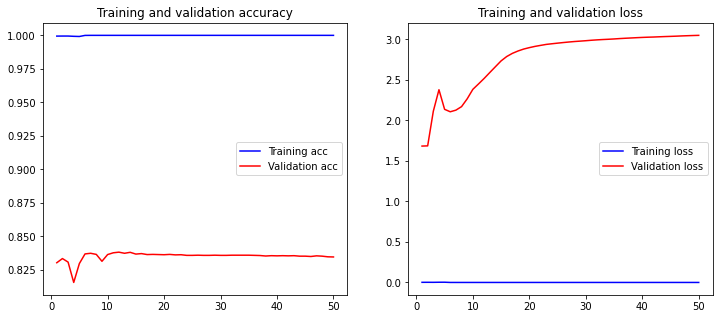

In [272]:
# classification on embedding features / deep learning model with one dimensional convolutional layer / binary classification

history = model.fit(xtr, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(xte, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(xtr, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(xte, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 40, 50)            1270550   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 36, 128)           32128     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 55        
Total params: 1,304,023
Trainable params: 1,304,023
Non-trainable params: 0
_________________________________________________________________


C:\Users\stadia\.conda\envs\TFEnv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 0.9878
Testing Accuracy:  0.8473


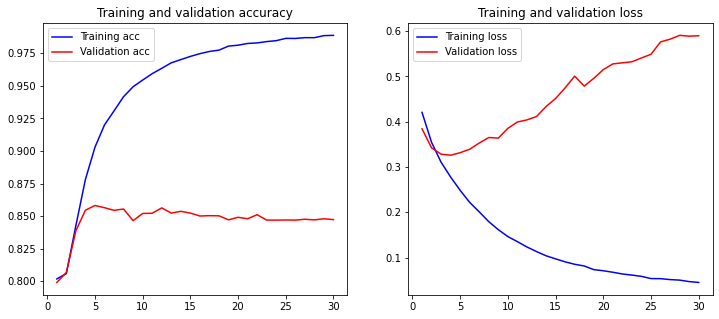

In [322]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=50, 
                           input_length=40))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


history = model.fit(xtr, y_train_multi,
                    epochs=30,
                    verbose=False,
                    validation_data=(xte, y_test_multi),
                    batch_size=10)
loss, accuracy = model.evaluate(xtr, y_train_multi, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(xte, y_test_multi, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [278]:
tr_sentences,tfidf_vectorizer, tfidf_vectorizer.vocabulary_,features = Tf_idf_Vectorizer(x,1000,20,1)
print(len(tfidf_vectorizer.vocabulary_))

pd.DataFrame(
    features.todense(),
    columns=tfidf_vectorizer.get_feature_names()
)

2945


,00,000,03,10,100,1000,11,12,13,14,...,york,young,youth,youtub,yr,zealand,zero,zombi,zone,zoom
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33439,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33440,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33441,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33442,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [284]:
training_set_size = int(features.shape[0]*0.75)


X_train = features[:training_set_size]
y_train = y[:training_set_size]

X_test = features[training_set_size:]
y_test = y[training_set_size:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25083, 2945)
(8361, 2945)
(25083,)
(8361,)


In [291]:
# classification on tf_idf features ( min_df : 5 , max_df : 1000 , ngrams : 1 )

classifier = LogisticRegression(max_iter = 1000)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.8095921540485588


In [56]:
d, features = Bag_Of_Word_Vectorizer(BOW_Data, 5000, words)

In [57]:
print(len(BOW_Data))
training_set_size = int(len(features)*0.75)


X_train = features[:training_set_size]
y_train = y[:training_set_size]

X_test = features[training_set_size:]
y_test = y[training_set_size:]

print(np.asarray(X_train).shape)
print(np.asarray(X_test).shape)
print(np.asarray(y_train).shape)
print(np.asarray(y_test).shape)

33444
(25083, 5000)
(8361, 5000)
(25083,)
(8361,)


In [63]:
classifier = LogisticRegression(max_iter = 100)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

C:\Users\stadia\.conda\envs\TFEnv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8714268628154527


In [20]:
# gives accuracy 86% on test   
def testing_resultV1(path):
    # read data source
    df = pd.read_csv(path , encoding='latin1')
    
    # transform data to data structure
    Datasets = [(ID,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment) 
                for ID,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment in df.itertuples()]
    # apply cleaning & normalizing algorithms
    Data = Preprocess_Data(Datasets)
    # convert list of sentences of words to list of words
    out1 = AOW_AOS(Data)
    
    # dictionaries for multi & binary classification
    dictionary_binary = {'Positive' : 1, 'Negative' : 0, 'Extremely Negative' : 0, 'Extremely Positive' : 1, 'Neutral' : 2}
    dictionary_btest = {'Positive' : 1, 'Negative' : 0, 'Extremely Negative' : 0, 'Extremely Positive' : 1}
    dictionary_multi = {'Positive' : 0, 'Negative' : 1, 'Extremely Negative' : 2, 'Extremely Positive' : 3, 'Neutral' : 4}
    y_multi = np.zeros((len(out1),5))
    
    # make y vector in to cases : multi and binary
    # 1- binary : 1 : 'Positive' , 'Extremely Positive' / 2 : 'Negative' , 'Extremely Negative' then delete 'Neutral' cases
    # 2- multi : 2 : unique index for each of 5 classes

    counter = 0
    for i in range(0,len(out1)):
    #print(counter)
        #y[counter] = dictionary_btest[Datasets[i][-1]]
        y_multi[i][dictionary_multi[Datasets[i][-1]]] = 1              
        #counter+=1
 

    # train test split / problem with sklearn method
    training_set_size = int(len(out1)*0.75)


    X_train = out1[:training_set_size]
    #y_train = y[:training_set_size]
    y_train_multi = y_multi[:training_set_size]

    X_test = out1[training_set_size:]
    #y_test = y[training_set_size:]
    y_test_multi = y_multi[training_set_size:]

    print(len(X_train))
    print(len(X_test))
    print(y_train_multi.shape)
    print(y_test_multi.shape)
    
    # prepare training data for embedding layer ( 10000 voc / 40 max vector size)
    vocab_size,xtr,xte = Prepare_For_Embedding(X_train,X_test,10000,40)
    print(xtr[1000])

    #print(out1[:10])
    print(xtr.shape)
    print(y_train_multi.shape)
    
    # DL model ( output equal 50 selected in embedding layer )
   
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=50, 
                           input_length=40))
    model.add(layers.Conv1D(64, 5, activation='relu'))
    model.add(layers.MaxPooling1D())
    model.add(Dropout(0.4))
    #model.add(layers.Conv1D(128, 9, activation='relu'))
    #model.add(layers.GlobalMaxPooling1D())
    #model.add(Dropout(0.6))
    model.add(layers.Conv1D(32, 3, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(Dropout(0.25))
    model.add(layers.Dense(16, activation='relu'))
    model.add(Dropout(0.33))
    model.add(layers.Dense(8, activation='relu'))
    model.add(Dropout(0.33))
    model.add(layers.Dense(5, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.summary()


    history = model.fit(xtr, y_train_multi,
                    epochs=4,
                    verbose=False,
                    validation_data=(xte, y_test_multi),
                    batch_size=32)
   
    loss, accuracy = model.evaluate(xte, y_test_multi, verbose=False)
    print("accuracy on test is:  {:.4f}".format(accuracy))
    
    return history,model

In [21]:
his, model = testing_resultV1('Covid_19_tweets_train.csv')

30867
10290
(30867, 5)
(10290, 5)
[1532    7    1   78   13 1242   18    6    3  280  564  238  128   94
  756  601  176  625 1925 1804  249  316  197  153    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
(30867, 40)
(30867, 5)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 50)            1454200   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 36, 64)            16064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 18, 64)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 18, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 16, 32)            61

C:\Users\stadia\.conda\envs\TFEnv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


accuracy on test is:  0.6089


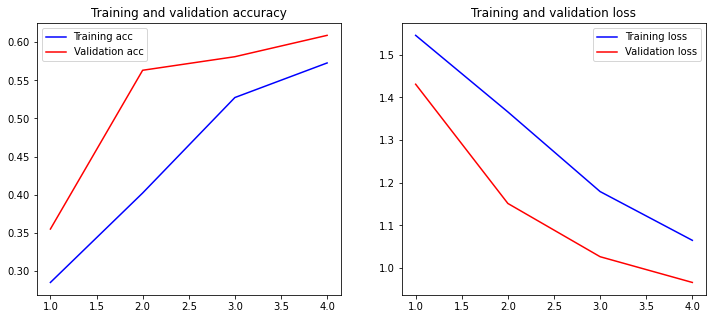

In [22]:
plot_history(his)

In [83]:
dictionary_multi = {'Positive' : 0, 'Negative' : 1, 'Extremely Negative' : 2, 'Extremely Positive' : 3, 'Neutral' : 4}
for i in range(0,1000):
    print(y_multi[i])
    print(Datasets[i][-1])
    print('\n____________________')
print(y_multi[2602])
print(Datasets[2602][-1])

[0. 0. 0. 0. 1.]
Neutral

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[0. 0. 0. 1. 0.]
Extremely Positive

____________________
[0. 0. 0. 1. 0.]
Extremely Positive

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[0. 0. 0. 1. 0.]
Extremely Positive

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 0

[0. 1. 0. 0. 0.]
Negative

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 0. 0. 1. 0.]
Extremely Positive

____________________
[0. 0. 0. 1. 0.]
Extremely Positive

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[0. 0. 0. 1. 0.]
Extremely Positive

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 1. 0. 0. 0.]
Negative

____________________


[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[0. 0. 0. 1. 0.]
Extremely Positive

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 0. 0. 1. 0.]
Extremely Positive

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 0. 0. 1. 0.]
Extremely Positive

____________________
[

[0. 0. 0. 0. 1.]
Neutral

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 0. 0. 1. 0.]
Extremely Positive

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[1. 0. 0. 0. 0.]
Positive

____________________
[0. 0. 0. 0. 1.]
Neutral

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 1. 0. 0. 0.]
Negative

____________________
[0. 0. 1. 0. 0.]
Extremely Negative

____________________
[0. 1. 0. 0. 0.]
Negative

______________

In [33]:
# gives accuracy 86% on test   
def testing_resultV2(path):
    # read data source
    df = pd.read_csv(path , encoding='latin1')
    
    # transform data to data structure
    Datasets = [(ID,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment) 
                for ID,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment in df.itertuples()]
    # apply cleaning & normalizing algorithms
    Data = Preprocess_Data(Datasets)
    words = [w for sents in Data for sent in sents[-2] for w in sent]
    # convert list of sentences of words to list of words
    out1 = AOW_AOS(Data)
    
    # dictionaries for multi & binary classification
    dictionary_binary = {'Positive' : 1, 'Negative' : 0, 'Extremely Negative' : 0, 'Extremely Positive' : 1, 'Neutral' : 2}
    dictionary_btest = {'Positive' : 1, 'Negative' : 0, 'Extremely Negative' : 0, 'Extremely Positive' : 1}
    dictionary_multi = {'Positive' : 0, 'Negative' : 1, 'Extremely Negative' : 2, 'Extremely Positive' : 3, 'Neutral' : 4}
    y_multi = np.zeros((len(out1),5))
    
    # make y vector in to cases : multi and binary
    # 1- binary : 1 : 'Positive' , 'Extremely Positive' / 2 : 'Negative' , 'Extremely Negative' then delete 'Neutral' cases
    # 2- multi : 2 : unique index for each of 5 classes

    y = np.zeros(len(out1))
    counter = 0
    for i in range(0,len(Datasets)):
        if(Datasets[i][-1] in dictionary_binary):
            y[i] = dictionary_binary[Datasets[i][-1]]
            counter+=1
  
    x = []
    temp = []
    indices = []
    for i in range(0,len(Datasets)):
        if(Datasets[i][-1] == 'Neutral'):
            continue
        x.append(out1[i])
        temp.append(Datasets[i])
        indices.append(i)
    BOW_Data = x.copy()
    print(len(x))
    print(len(indices))
    y = np.zeros(len(x))


    counter = 0
    for i in indices:
    #print(counter)
        y[counter] = dictionary_btest[Datasets[i][-1]]      
        counter+=1
    
    BOW_Data = x.copy()
    
    d, features = Bag_Of_Word_Vectorizer(BOW_Data, 5000, words)
    print(len(BOW_Data))
    training_set_size = int(len(features)*0.75)


    X_train = features[:training_set_size]
    y_train = y[:training_set_size]

    X_test = features[training_set_size:]
    y_test = y[training_set_size:]

    X_tr = np.asarray(X_train)
    X_te = np.asarray(X_test)
    y_tr = np.asarray(y_train)
    y_te = np.asarray(y_test)
   
    model = Sequential()
    model.add(Dense(64,activation='tanh',input_shape=(5000,)))
    model.add(Dense(32,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    sgd = SGD(lr=0.1,momentum=0.0,nesterov = False)
    model.compile(optimizer =sgd,loss = 'binary_crossentropy',metrics=['acc'])
    model.summary()
    
    history = model.fit(X_tr, y_tr,
                    epochs=8,
                    verbose=False,
                    validation_data=(X_te, y_te),
                    batch_size=10)

    loss, accuracy = model.evaluate(X_tr, y_tr, verbose=False)
    print("accuracy on train is:: {:.4f}".format(accuracy))
    loss, accuracy = model.evaluate(X_te, y_te, verbose=False)
    print("accuracy on test is::  {:.4f}".format(accuracy))
 
    return model

In [34]:
testing_resultV2('Covid_19_tweets_train.csv')

33444
33444
33444
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                320064    
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 322,177
Trainable params: 322,177
Non-trainable params: 0
_________________________________________________________________
accuracy on train is:: 0.9210
accuracy on test is::  0.8644


In [ ]:
# bow with dl model , bow with lr model , tfidf with lr model , emb vector with dl model with 1d conv binary classification,
#  emb vector with dl model with 1d conv multi classification 5,
#  emb vector with dl model with 1d conv binary classification 4 ( with out natural labels ).


In [6]:
# gives accuracy 87% on test   
def testing_result(path):
    # read data source
    df = pd.read_csv(path , encoding='latin1')
    
    # transform data to data structure
    Datasets = [(ID,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment) 
                for ID,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment in df.itertuples()]
    # apply cleaning & normalizing algorithms
    Data = Preprocess_Data(Datasets)
    words = [w for sents in Data for sent in sents[-2] for w in sent]
    # convert list of sentences of words to list of words
    out1 = AOW_AOS(Data)
    
    # dictionaries for multi & binary classification
    dictionary_binary = {'Positive' : 1, 'Negative' : 0, 'Extremely Negative' : 0, 'Extremely Positive' : 1, 'Neutral' : 2}
    dictionary_btest = {'Positive' : 1, 'Negative' : 0, 'Extremely Negative' : 0, 'Extremely Positive' : 1}
    dictionary_multi = {'Positive' : 0, 'Negative' : 1, 'Extremely Negative' : 2, 'Extremely Positive' : 3, 'Neutral' : 4}
    y_multi = np.zeros((len(out1),5))
    
    # make y vector in to cases : multi and binary
    # 1- binary : 1 : 'Positive' , 'Extremely Positive' / 2 : 'Negative' , 'Extremely Negative' then delete 'Neutral' cases
    # 2- multi : 2 : unique index for each of 5 classes

    y = np.zeros(len(out1))
    counter = 0
    for i in range(0,len(Datasets)):
        if(Datasets[i][-1] in dictionary_binary):
            y[i] = dictionary_binary[Datasets[i][-1]]
            counter+=1
  
    x = []
    temp = []
    indices = []
    for i in range(0,len(Datasets)):
        if(Datasets[i][-1] == 'Neutral'):
            continue
        x.append(out1[i])
        temp.append(Datasets[i])
        indices.append(i)
    BOW_Data = x.copy()
    print(len(x))
    print(len(indices))
    y = np.zeros(len(x))


    counter = 0
    for i in indices:
    #print(counter)
        y[counter] = dictionary_btest[Datasets[i][-1]]      
        counter+=1
    
    BOW_Data = x.copy()
    
    d, features = Bag_Of_Word_Vectorizer(BOW_Data, 5000, words)
    print(len(BOW_Data))
    training_set_size = int(len(features)*0.75)


    X_train = features[:training_set_size]
    y_train = y[:training_set_size]

    X_test = features[training_set_size:]
    y_test = y[training_set_size:]

    X_tr = np.asarray(X_train)
    X_te = np.asarray(X_test)
    y_tr = np.asarray(y_train)
    y_te = np.asarray(y_test)
   
    
    classifier = LogisticRegression(max_iter = 100)
    classifier.fit(X_tr, y_tr)
    score = classifier.score(X_te, y_te)
    print('accuracy on test is:',score)
 
    return classifier

In [7]:
testing_result('Covid_19_tweets_train.csv')

33444
33444
33444


C:\Users\stadia\.conda\envs\TFEnv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy on test is: 0.8714268628154527


LogisticRegression()